# Data exploration and Feature extraction

sources:
* https://www.sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/

**THE MAIN PREREQUISITE FOR MACHINE LEARNING IS DATA ANALYSIS**

**80% OF THE DATA SCIENTIST WORK WILL BE DATA PREPARATION, EDA, AND VISUALIZATION**

![image](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/wp-content/uploads/2016/05/163e383d244161938573edbab7670f76.2016-05-07_data-analysis-is-the-prerequisite_how-we-use-dataAnalysis.png)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-get-the-data" data-toc-modified-id="Step-1:-get-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1: get the data</a></span></li><li><span><a href="#Step-2:-basic-data-exploration" data-toc-modified-id="Step-2:-basic-data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2: basic data exploration</a></span><ul class="toc-item"><li><span><a href="#Missing-value" data-toc-modified-id="Missing-value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing value</a></span></li><li><span><a href="#View-data-distribution" data-toc-modified-id="View-data-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>View data distribution</a></span></li><li><span><a href="#Identify-outlier" data-toc-modified-id="Identify-outlier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Identify outlier</a></span></li><li><span><a href="#Check-correlation-between-features" data-toc-modified-id="Check-correlation-between-features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Check correlation between features</a></span></li></ul></li><li><span><a href="#Prepare-dataset" data-toc-modified-id="Prepare-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare dataset</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset" data-toc-modified-id="Split-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split the dataset</a></span></li><li><span><a href="#Build-the-pipeline" data-toc-modified-id="Build-the-pipeline-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Build the pipeline</a></span></li></ul></li><li><span><a href="#Your-work---Palmer-Archipelago-(Antarctica)-penguin-data" data-toc-modified-id="Your-work---Palmer-Archipelago-(Antarctica)-penguin-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Your work - Palmer Archipelago (Antarctica) penguin data</a></span></li></ul></div>

## Your work - Palmer Archipelago (Antarctica) penguin data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. 

Please cite this data using: *Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081*

`penguins_size.csv` is simplified data from original penguin data sets and contains variables:

* species: penguin species (Chinstrap, Adélie, or Gentoospecies: penguin species (Chinstrap, Adélie, or Gentoo`)
* culmen_length_mm: culmen length (mm) 
* culmen_depth_mm: culmen depth (mm) 
* flipper_length_mm: flipper length (mm) 
* body_mass_g: body mass (g) 
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* sex: penguin sex

The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages). 

The goal, is to predict the species ![species](https://imgur.com/orZWHly.png)

In [23]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [24]:
# Read dataset with pandas
path = "http://www.i3s.unice.fr/~riveill/dataset/penguins_size.csv"

penguins = pd.read_csv(path)
penguins.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [25]:
# Look at the initial type of each column
penguins.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [26]:
# Assign the correct type to each column
penguins = penguins.astype({'species':'category', 'island':'category', 'sex':'category'})
penguins.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [27]:
# Replace the name of the target column with target
penguins = penguins.rename(columns={'species':'target'})

In [28]:
# Are there any missing values ?
penguins.isnull().sum()

target                0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

We have just seen that we can process the missing values in the pipeline. However, as we are going to explore the data, it may be interesting to remove the missing values first. 

In [29]:
# Remove missing values, by preparing a new dataframe
pengins_cleaned = penguins.dropna()

In [30]:
# Check that this new dataset does not contain any missing values
pengins_cleaned.isnull().sum()

target               0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<AxesSubplot:ylabel='target'>

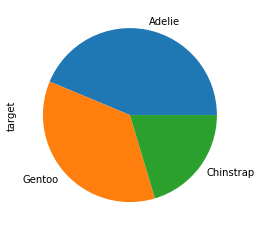

In [31]:
# Is the dataset well balanced? To do so, display the histogram or a pie of the target class.
pengins_cleaned['target'].value_counts().plot.pie()

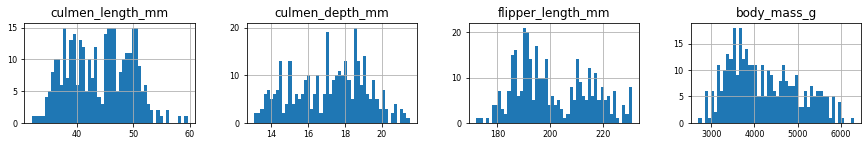

In [32]:
# Plot the distribution of each features
pengins_cleaned.hist(layout=(4,4), bins=50, xlabelsize=8, ylabelsize=8, figsize=(15,9));

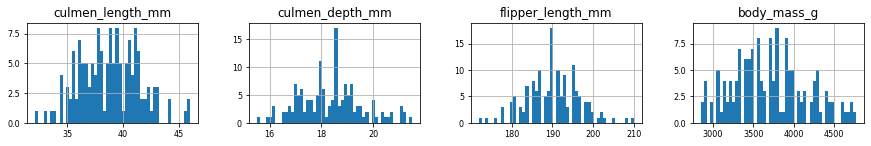

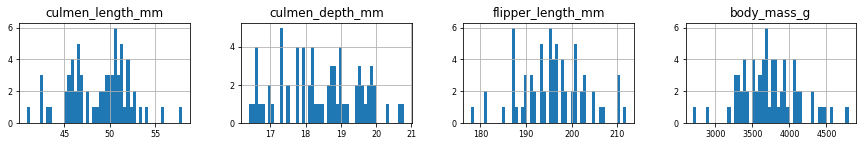

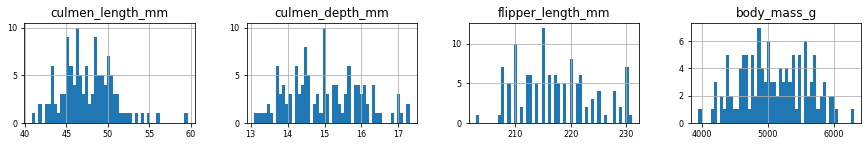

In [33]:
# Plot the distribution of each features by target class
pengins_cleaned.groupby("target").hist(layout=(4,4), bins=50, xlabelsize=8, ylabelsize=8, figsize=(15,9));

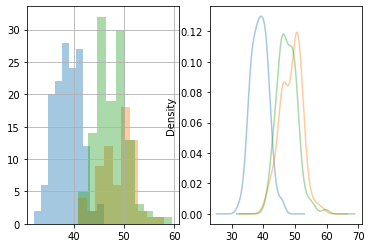

In [34]:
# Plot the distribution and the density of the culmen_length_mm features by target class
fig, axes = plt.subplots(nrows=1, ncols=2)

pengins_cleaned.groupby("target")['culmen_length_mm'].hist(alpha=0.4, ax=axes[0]);
pengins_cleaned.groupby("target")['culmen_length_mm'].plot.kde(alpha=0.4, ax=axes[1]);

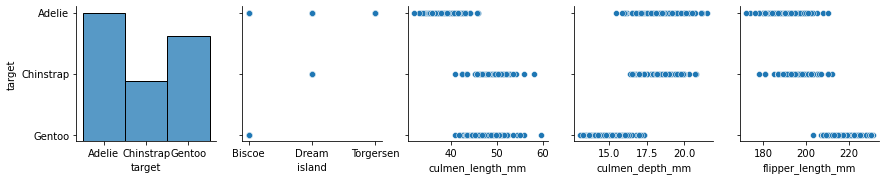

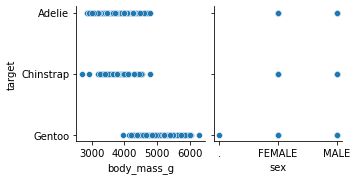

In [35]:
# Try to identify outliers
for i in range(0, len(pengins_cleaned.columns), 5):
    sns.pairplot(data=pengins_cleaned,
                x_vars=pengins_cleaned.columns[i:i+5],
                y_vars=['target'])

It seems that the sex is not known for some observations. We could delete them.

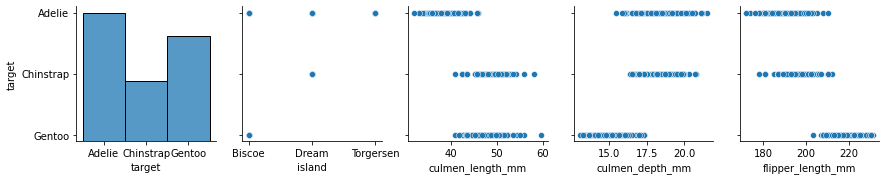

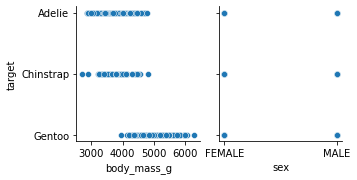

In [36]:
# Remove the detected outlier
pengins_cleaned = pengins_cleaned.drop(pengins_cleaned[pengins_cleaned['sex']=="."].index)

for i in range(0, len(pengins_cleaned.columns), 5):
    sns.pairplot(data=pengins_cleaned,
                x_vars=pengins_cleaned.columns[i:i+5],
                y_vars=['target'])

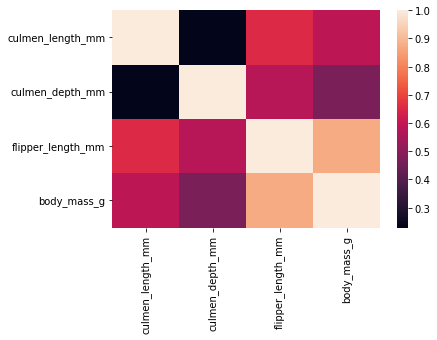

In [37]:
# Using sns, display the correlations between the features. What do you observe?
sns.heatmap(pengins_cleaned.corr().abs());

Contrary to the previous example, it is not possible to have a correlation between all the features. It is only possible between numerical values.

We will now prepare the dataset, to build a first model

In [38]:
# Starting from the original, non-cleaned dataset, split the dataset with a ratio of 0.2
from sklearn.model_selection import train_test_split

# target in "y"
y = penguins['target']

# feature matrix in "X" 
columns = list(penguins.columns)
columns.remove('target')
X = penguins[columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((258, 6), (86, 6), (258,), (86,))

In [39]:
'''
Build a pipeline that
- replaces missing numerical values with the mean value
- replaces missing categorical values with the most frequent value
- normalizes the numerical features
- one hot encodes the other categorical features
'''
numeric_features = [f for f, t in zip(X_train.columns, X_train.dtypes) if t in ['float64', 'int32']]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
numeric_features

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [40]:
categorical_features = [f for f in X_train.columns if f not in numeric_features]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))])
categorical_features

['island', 'sex']

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [42]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LogisticRegression())])

In [43]:
# Model training
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['culmen_length_mm',
                                                   'culmen_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                        

In [44]:
# Prediction
y_pred = clf.predict(X_test)

In [45]:
# Model evaluation
from sklearn.metrics import accuracy_score

ACC = accuracy_score(y_test, y_pred)
print("model accuracy: %.3f" % ACC)

model accuracy: 0.988


In [88]:
# Print multilabel confusion matrix
from sklearn.metrics import multilabel_confusion_matrix

cf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[[45  1]
  [ 0 40]]

 [[68  0]
  [ 1 17]]

 [[58  0]
  [ 0 28]]]


In [89]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[40  0  0]
 [ 1 17  0]
 [ 0  0 28]]


''

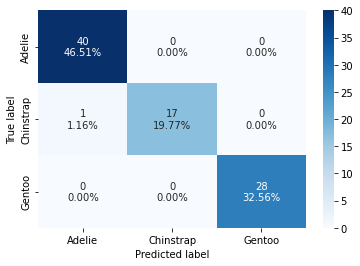

In [73]:
# Plot confusion matric
import seaborn as sns

values = ["{0:d}".format(value) for value in cf_matrix.flatten()]
percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
box_values = [f"{v1}\n{v2}".strip() for v1, v2 in zip(values,percentages)]
box_values = np.asarray(box_values).reshape(cf_matrix.shape[0],cf_matrix.shape[1])
                  
categories = ["{0:s}".format(label) for label in np.unique(penguins['target'])]

sns.heatmap(cf_matrix, annot=box_values, fmt="", xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
;

In [101]:
# From confusion matrix, calculate Accuracy, Recall and Precision
print("\t   precision\trecall\tsupport")
for i, cat in enumerate(categories):
    TP = cf_matrix[i,i]
    FP = sum(cf_matrix[:,i])-TP
    FN = sum(cf_matrix[i,:])-cf_matrix[i,i]
    N = sum(cf_matrix[i,:])
    print("{0:10s}\t{1:.2f}\t{2:.2f}\t{3:d}".format(cat, TP/(FP+TP), TP/(FN+TP), N))
    
print()
print("accucacy\t{0:.3f}".format(np.trace(cf_matrix) / np.sum(cf_matrix)))

	   precision	recall	support
Adelie    	0.98	1.00	40
Chinstrap 	1.00	0.94	18
Gentoo    	1.00	1.00	28

accucacy	0.988


In [92]:
# Verify your value with classification_report from sklearn
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=categories))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86

